<a href="https://colab.research.google.com/github/jhiagho/Hiagho-Junio/blob/master/Untitled7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from skimage import color, viewer, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimage
import matplotlib.pylab as plt
from scipy.ndimage import affine_transform, zoom
from scipy import misc

In [48]:
import cv2

cap=cv2.VideoCapture("/content/video/video_adubo.mp4")

cont = 0
while(cap.isOpened()):
  flag,frame=cap.read()
  if flag==False: #flag que para o extração dos frames
    break
  caminho = '/content/frames/video_adubo' + str(cont) +'.jpg'
  cv2.imwrite(caminho,frame)
  cont+=1

cap.release()
cv2.destroyAllWindows()

In [ ]:
# Importing Necessary Libraries
import os 
import skimage 
from natsort import natsorted, ns
from skimage import io 
from skimage import data
from skimage import filters
from skimage.color import rgb2gray
import matplotlib.pyplot as plt

list_files = os.listdir('/content/frames')
list_files = natsorted(list_files)
list_files.pop(0)
image_list = []
for filename in list_files:
  print(filename)
  image_list.append(io.imread('frames/'+filename))
  # file = os.path.join(skimage.data_dir, filename) 
  # image_list.append(io.imread()) 

In [ ]:
imshow(image_list[3],cmap='gray'), show()

In [ ]:
cont = 0
for z in range(729):
  # Contrast stretching. Técnica para manipulação do contraste da imagem, adicionando ou removendo o branco da imagem
  p2, p98 = np.percentile(image_list[z], (2, 90))
  img_rescale1 = exposure.rescale_intensity(image_list[z], in_range=(p2, p98))

  p2, p98 = np.percentile(image_list[z+1], (2, 90))
  img_rescale2 = exposure.rescale_intensity(image_list[z+1], in_range=(p2, p98))

  # Transforma a imagem em escala de cinza
  gray_r1 = rgb2gray(image_list[z])
  gray_r2 = rgb2gray(image_list[z+1])

  # Criar a mascarar apartir das duas imagens
  binarized_gray = (abs(gray_r1 - gray_r2) > 0.3*gray_r1)

  #Aplicar a marcára na imagem original
  # mask = exposure.equalize_hist(image_list[0])
  # b = exposure.equalize_hist(image_list[1])
  mask = image_list[z].copy()
  b = image_list[z].copy()

  n,m,_= image_list[z].shape
  for i in range(n):
    for j in range(m):
      mask[i][j] = binarized_gray[i][j] * b[i][j]

  io.imsave('/content/frames_maskarados/frame_m '+ str(cont) +' .jpg',mask)
  cont+=1
  
plt.imshow(mask)

In [68]:
def convert_frames_to_video():
  #captura os frames do videos markarados é ordena eles
  pasta = os.listdir('/content/frames_maskarados')
  pasta = natsorted(pasta)
  pasta.pop(0)
  print(pasta)

  list_frames = []
  for frame in pasta:
      img = cv2.imread('/content/frames_maskarados/'+ frame)
      height, width, layers = img.shape
      size = (width,height)
      list_frames.append(img)

  out = cv2.VideoWriter('video_adubo_mascardo.mp4',cv2.VideoWriter_fourcc(*'DIVX'), 15, size)

  for i in range(len(list_frames)):
    out.write(list_frames[i])
  out.release()

In [69]:
convert_frames_to_video()

['frame_m 0 .jpg', 'frame_m 1 .jpg', 'frame_m 2 .jpg', 'frame_m 3 .jpg', 'frame_m 4 .jpg', 'frame_m 5 .jpg', 'frame_m 6 .jpg', 'frame_m 7 .jpg', 'frame_m 8 .jpg', 'frame_m 9 .jpg', 'frame_m 10 .jpg', 'frame_m 11 .jpg', 'frame_m 12 .jpg', 'frame_m 13 .jpg', 'frame_m 14 .jpg', 'frame_m 15 .jpg', 'frame_m 16 .jpg', 'frame_m 17 .jpg', 'frame_m 18 .jpg', 'frame_m 19 .jpg', 'frame_m 20 .jpg', 'frame_m 21 .jpg', 'frame_m 22 .jpg', 'frame_m 23 .jpg', 'frame_m 24 .jpg', 'frame_m 25 .jpg', 'frame_m 26 .jpg', 'frame_m 27 .jpg', 'frame_m 28 .jpg', 'frame_m 29 .jpg', 'frame_m 30 .jpg', 'frame_m 31 .jpg', 'frame_m 32 .jpg', 'frame_m 33 .jpg', 'frame_m 34 .jpg', 'frame_m 35 .jpg', 'frame_m 36 .jpg', 'frame_m 37 .jpg', 'frame_m 38 .jpg', 'frame_m 39 .jpg', 'frame_m 40 .jpg', 'frame_m 41 .jpg', 'frame_m 42 .jpg', 'frame_m 43 .jpg', 'frame_m 44 .jpg', 'frame_m 45 .jpg', 'frame_m 46 .jpg', 'frame_m 47 .jpg', 'frame_m 48 .jpg', 'frame_m 49 .jpg', 'frame_m 50 .jpg', 'frame_m 51 .jpg', 'frame_m 52 .jpg', 'f

In [ ]:
p2, p98 = np.percentile(image_list[0], (2, 80))
img_rescale = exposure.rescale_intensity(image_list[0], in_range=(p2, p98))
p2, p98 = np.percentile(image_list[1], (2, 80))
img_rescale1 = exposure.rescale_intensity(image_list[1], in_range=(p2, p98))
imshow(img_rescale,cmap='gray'), show()
imshow(img_rescale1,cmap='gray'), show()

In [ ]:
img_eq1 = exposure.equalize_hist(image_list[0])
img_eq2 = exposure.equalize_hist(image_list[1])
img_adapteq1 = exposure.equalize_adapthist(image_list[0], clip_limit=0.10)
img_adapteq2 = exposure.equalize_adapthist(image_list[1], clip_limit=0.10)
imshow(img_eq1,cmap='gray'), show()
imshow(img_eq2,cmap='gray'), show()
imshow(img_adapteq1,cmap='gray'), show()
imshow(img_adapteq2,cmap='gray'), show()

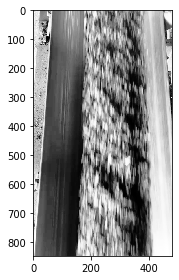

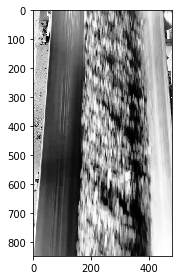

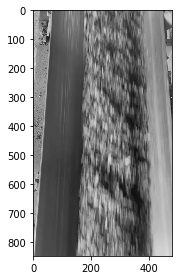

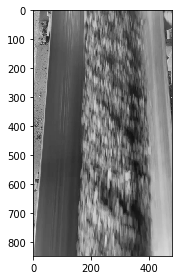

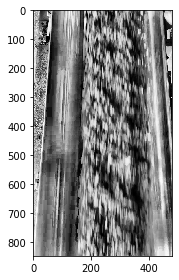

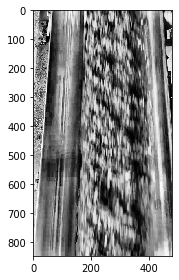

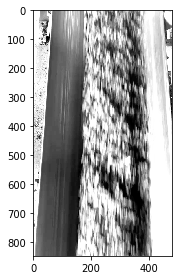

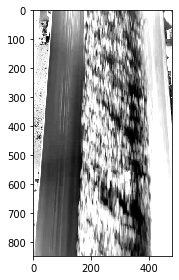

(<matplotlib.image.AxesImage at 0x7ff4eb182510>, None)

In [ ]:
gray_adubo1 = rgb2gray(img_eq1)
gray_adubo2 = rgb2gray(img_eq2)
gray1 = rgb2gray(image_list[0])
gray2 = rgb2gray(image_list[1])
gray_a1 = rgb2gray(img_adapteq1)
gray_a2 = rgb2gray(img_adapteq2)
gray_r1 = rgb2gray(img_rescale)
gray_r2 = rgb2gray(img_rescale1)

imshow(gray_adubo1,cmap='gray'), show()
imshow(gray_adubo2,cmap='gray'), show()
imshow(gray1,cmap='gray'), show()
imshow(gray2,cmap='gray'), show()
imshow(gray_a1,cmap='gray'), show()
imshow(gray_a2,cmap='gray'), show()
imshow(gray_r1,cmap='gray'), show()
imshow(gray_r2,cmap='gray'), show()

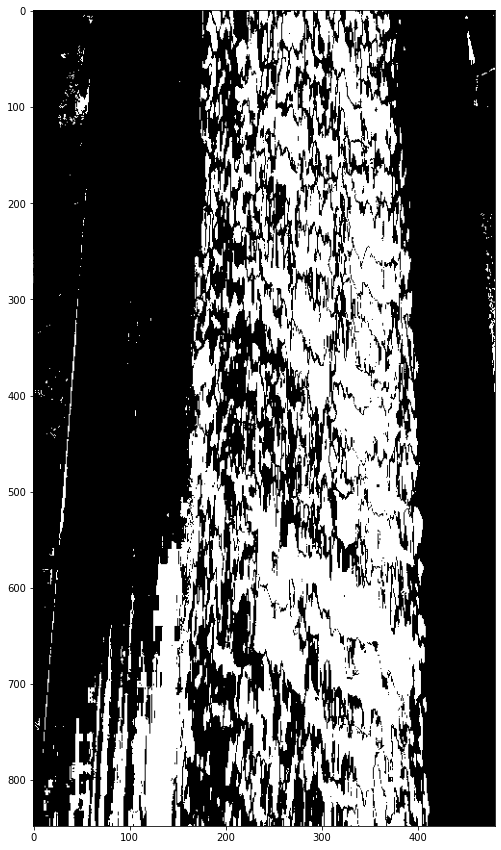

In [ ]:
plt.figure(figsize=(15, 15))
#for i in range(10):

binarized_gray = (abs(gray_r1 - gray_r2) > 0.3*gray_r1)
  #plt.subplot(5,2,i+1)

  #plt.title("Threshold: >"+str(round(i*0.1,1)))
plt.imshow(binarized_gray, cmap = 'gray')


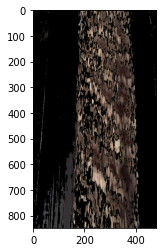

In [ ]:
mask = image_list[0].copy()
b = image_list[0].copy()

n,m,_= image_list[0].shape
for i in range(n):
  for j in range(m):
    mask[i][j] = binarized_gray[i][j] * b[i][j]

plt.imshow(mask, cmap = 'gray')

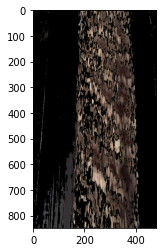

In [ ]:
img_eq1 = exposure.equalize_hist(mask)
plt.imshow(mask, cmap = 'gray')

In [ ]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.filters import try_all_threshold

img = io.imread('/content/frames/video_adubo0.jpg',as_gray=True)

fig, ax = try_all_threshold(img, figsize=(10, 8), verbose=False)
plt.show()